# HARLF Implementation - Part 1: Data Collection & Technical Indicators

This notebook implements data collection and technical indicator calculation for the HARLF (Hierarchical Adaptive Reinforcement Learning Framework) system.

## Key Components:
- Asset price data collection using yfinance
- Technical indicators calculation (Sharpe, Sortino, Calmar ratios)
- Correlation features extraction
- Data preprocessing and normalization


## Setup and Configuration

This section loads required libraries and sets up the configuration for data collection.


In [1]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import yfinance as yf
import pickle
from datetime import date

warnings.filterwarnings('ignore')
np.random.seed(42)

from utile import *

print("Libraries loaded successfully")


Libraries loaded successfully


## Asset Configuration

Define the asset universe and time periods for the HARLF implementation.


In [2]:
# Asset universe - tech and growth stocks for HARLF
ASSETS = {
    'RDDT': 'Reddit Inc',
    'NVDA': 'NVIDIA Corporation', 
    'SMR': 'NuScale Power Corporation',
    'MU': 'Micron Technology Inc',
    'MRVL': 'Marvell Technology Group',
    'MSFT': 'Microsoft Corporation',
    'ASML': 'ASML Holding NV',
    'AEM': 'Agnico Eagle Mines Ltd',
    'AMD': 'Advanced Micro Devices',
    'VERU': 'Veru Inc',
    'AI': 'C3.ai Inc',
    'GOOGL': 'Alphabet Inc (Google)',
    'INGM': 'Inogen Inc',
    'PLUG': 'Plug Power Inc',
    'IONQ': 'IonQ Inc',
    'RGTI': 'Rigetti Computing Inc',
    'ARBE': 'Arbe Robotics Ltd'
}

# Training and testing periods from HARLF paper
TRAIN_START = "2003-01-01"
TRAIN_END = "2017-12-31"
TEST_START = "2018-01-01" 
TEST_END = date.today().strftime("%Y-%m-%d")


print(f"Assets: {len(ASSETS)}")
print(f"Training: {TRAIN_START} to {TRAIN_END}")
print(f"Testing: {TEST_START} to {TEST_END}")


Assets: 17
Training: 2003-01-01 to 2017-12-31
Testing: 2018-01-01 to 2025-08-05


## Collect data using custom function defined in my utile.py

Run the data collection pipeline and save results to pickle files.


In [3]:
# Execute data collection pipeline
print("=== Starting Data Collection ===")

# Collect price data
prices, monthly_prices, monthly_returns = collect_price_data(ASSETS, TRAIN_START, TEST_END)

# Calculate technical indicators
technical_indicators = calculate_technical_indicators(prices, monthly_returns)

# Save results
with open('outputs/monthly_prices.pkl', 'wb') as f:
    pickle.dump(monthly_prices, f)
with open('outputs/monthly_returns.pkl', 'wb') as f:
    pickle.dump(monthly_returns, f)
with open('outputs/technical_indicators.pkl', 'wb') as f:
    pickle.dump(technical_indicators, f)
with open('outputs/assets.pkl', 'wb') as f:
    pickle.dump(ASSETS, f)
with open('outputs/date_params.pkl', 'wb') as f:
    pickle.dump({'train_start': TRAIN_START, 'train_end': TRAIN_END, 
                 'test_start': TEST_START, 'test_end': TEST_END}, f)

print(f"\n=== Data Collection Complete ===")
print(f"Monthly prices saved to outputs/monthly_prices.pkl, shape: {monthly_prices.shape}")
print(f"Monthly returns saved to outputs/monthly_returns.pkl, shape: {monthly_returns.shape}")
print(f"Technical indicators saved to outputs/technical_indicators.pkl, shape: {technical_indicators.shape}")
print(f"Technical indicators dates range: {technical_indicators.index.min()} to {technical_indicators.index.max()}")

print("\nReady for Part 2: Environment & Sentiment Analysis")


=== Starting Data Collection ===


[*********************100%***********************]  17 of 17 completed


Using Adj Close for RDDT
Using Adj Close for NVDA
Using Adj Close for SMR
Using Adj Close for MU
Using Adj Close for MRVL
Using Adj Close for MSFT
Using Adj Close for ASML
Using Adj Close for AEM
Using Adj Close for AMD
Using Adj Close for VERU
Using Adj Close for AI
Using Adj Close for GOOGL
Using Adj Close for INGM
Using Adj Close for PLUG
Using Adj Close for IONQ
Using Adj Close for RGTI
Using Adj Close for ARBE
Data collected: (271, 17)
Calculating indicators...
Indicators calculated: (271, 221)

=== Data Collection Complete ===
Monthly prices saved to outputs/monthly_prices.pkl, shape: (272, 17)
Monthly returns saved to outputs/monthly_returns.pkl, shape: (271, 17)
Technical indicators saved to outputs/technical_indicators.pkl, shape: (271, 221)
Technical indicators dates range: 2003-02-28 00:00:00 to 2025-08-31 00:00:00

Ready for Part 2: Environment & Sentiment Analysis


In [4]:
monthly_prices.head()

,RDDT,NVDA,SMR,MU,MRVL,MSFT,ASML,AEM,AMD,VERU,AI,GOOGL,INGM,PLUG,IONQ,RGTI,ARBE
Date,,,,,,,,,,,,,,,,,
2003-01-31,50.44,0.08,10.06,8.02,3.90,14.55,7.57,11.03,5.24,1.51,92.49,2.5,24.41,51.3,10.8,9.9,9.65
2003-02-28,50.44,0.10,10.06,7.80,4.39,14.57,6.83,10.43,5.49,1.40,92.49,2.5,24.41,53.5,10.8,9.9,9.65
2003-03-31,50.44,0.10,10.06,7.95,4.52,14.89,6.21,9.95,6.18,1.27,92.49,2.5,24.41,50.6,10.8,9.9,9.65
2003-04-30,50.44,0.11,10.06,8.30,4.92,15.72,8.32,7.60,7.44,1.28,92.49,2.5,24.41,50.7,10.8,9.9,9.65
2003-05-31,50.44,0.20,10.06,11.06,6.75,15.13,9.50,8.45,7.28,1.31,92.49,2.5,24.41,54.3,10.8,9.9,9.65


In [5]:
monthly_returns.head()

,RDDT,NVDA,SMR,MU,MRVL,MSFT,ASML,AEM,AMD,VERU,AI,GOOGL,INGM,PLUG,IONQ,RGTI,ARBE
Date,,,,,,,,,,,,,,,,,
2003-02-28,0.0,0.22,0.0,-0.03,0.12,0.00,-0.10,-0.06,0.05,-0.08,0.0,0.0,0.0,0.04,0.0,0.0,0.0
2003-03-31,0.0,0.00,0.0,0.02,0.03,0.02,-0.10,-0.05,0.12,-0.10,0.0,0.0,0.0,-0.06,0.0,0.0,0.0
2003-04-30,0.0,0.10,0.0,0.04,0.08,0.05,0.29,-0.27,0.19,0.01,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2003-05-31,0.0,0.60,0.0,0.29,0.32,-0.04,0.13,0.11,-0.02,0.02,0.0,0.0,0.0,0.07,0.0,0.0,0.0
2003-06-30,0.0,-0.11,0.0,0.04,0.08,0.04,-0.05,0.04,-0.13,0.09,0.0,0.0,0.0,-0.15,0.0,0.0,0.0


In [6]:
technical_indicators.tail()

,RDDT_sharpe,RDDT_sortino,RDDT_calmar,RDDT_volatility,RDDT_max_drawdown,NVDA_sharpe,NVDA_sortino,NVDA_calmar,NVDA_volatility,NVDA_max_drawdown,...,corr_126,corr_127,corr_128,corr_129,corr_130,corr_131,corr_132,corr_133,corr_134,corr_135
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-30,0.6671,0.6671,0.2016,0.9464,1.0,0.5673,0.2979,0.1742,0.4209,0.1988,...,0.3898,0.8667,0.7155,0.9117,0.5089,0.4450,0.3443,0.6983,0.8269,0.8403
2025-05-31,0.6520,0.6520,0.1958,0.9494,1.0,0.6069,0.3147,0.1995,0.4624,0.1988,...,0.5349,0.9588,0.8520,0.9553,0.5144,0.3662,0.3706,0.6987,0.8685,0.8516
2025-06-30,0.7402,0.7402,0.2376,0.9862,1.0,0.7208,0.3629,0.2426,0.4304,0.1988,...,0.9717,0.9644,0.8463,0.9701,0.4776,0.2721,0.4190,0.6826,0.8562,0.8285
2025-07-31,0.7613,0.7613,0.2462,0.9844,1.0,0.7957,0.3946,0.2694,0.4117,0.1988,...,0.9540,1.0000,0.8367,1.0000,0.4235,0.2280,0.3334,0.6495,0.8276,0.7913
2025-08-31,0.8325,0.8325,0.2794,1.0000,1.0,0.7517,0.3760,0.2500,0.4092,0.1988,...,1.0000,0.9959,0.8393,0.9993,0.4755,0.1928,0.3638,0.6709,0.8238,0.7929


## Data Visualization

Simple visualizations to understand the collected data and verify quality.


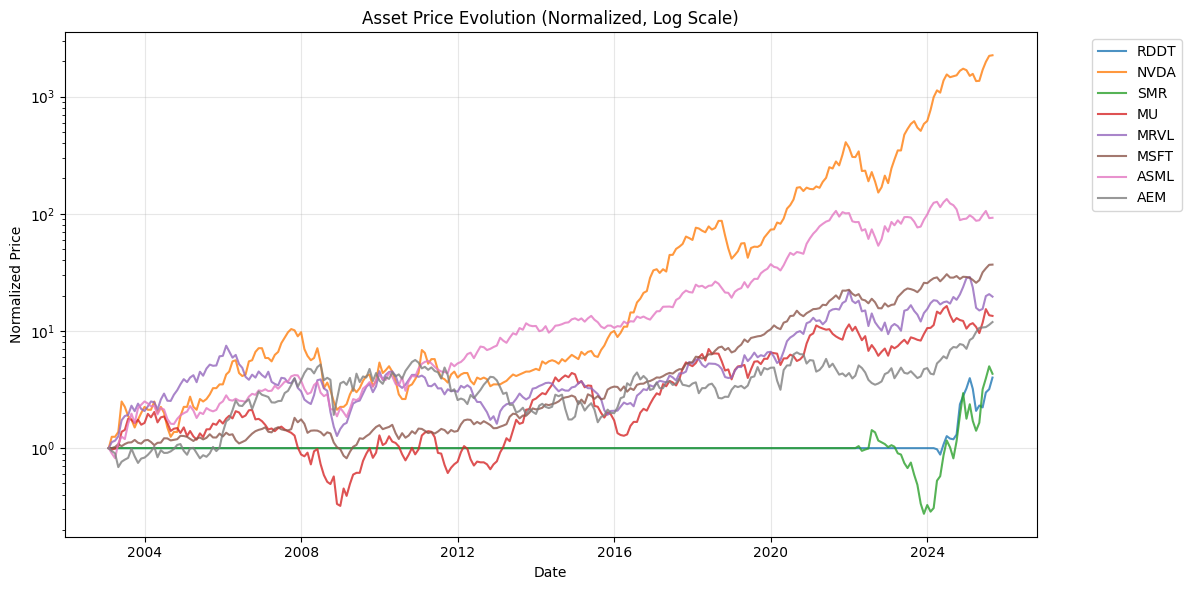

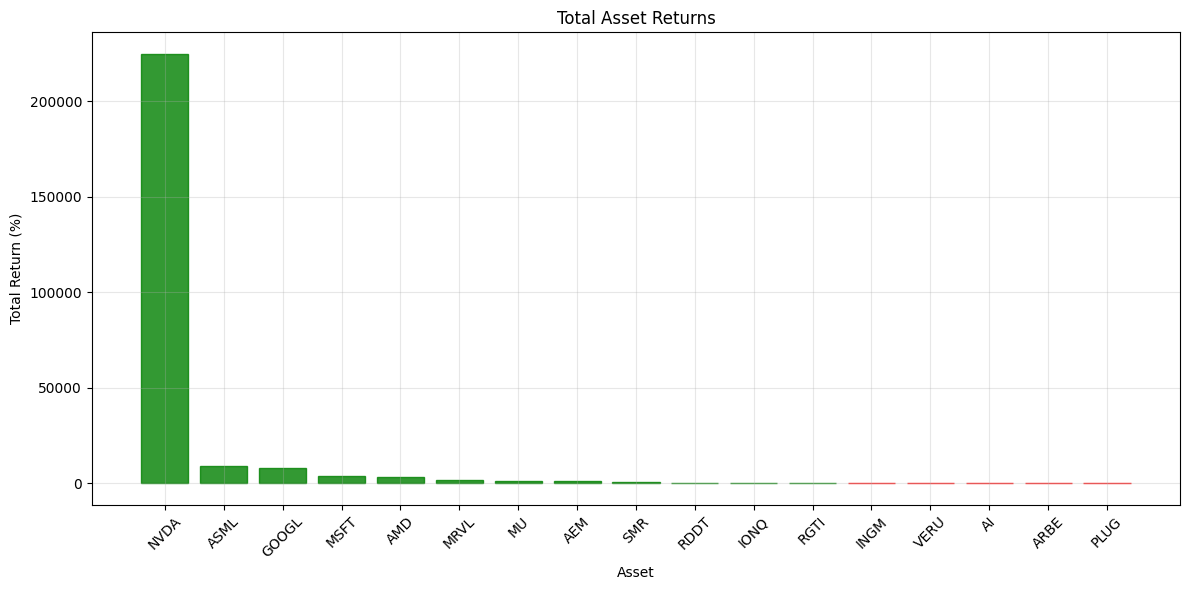

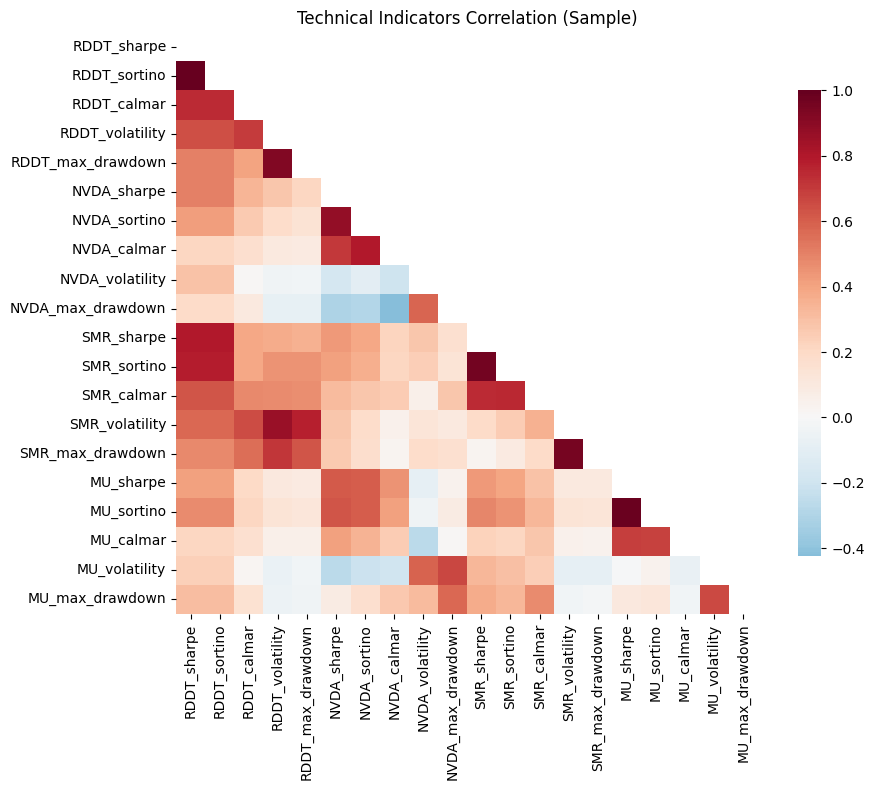

Best performer: NVDA (224900.0%)
Worst performer: PLUG (-97.2%)
Data quality: No NaN values: True


In [7]:
# Asset price evolution (normalized)
plt.figure(figsize=(12, 6))
for ticker in list(ASSETS.keys())[:8]:  # Plot first 8 assets
    if ticker in monthly_prices.columns:
        normalized_price = monthly_prices[ticker] / monthly_prices[ticker].iloc[0]
        plt.plot(normalized_price.index, normalized_price, label=ticker, alpha=0.8)

plt.yscale('log')
plt.title('Asset Price Evolution (Normalized, Log Scale)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Asset performance comparison
total_returns = {}
for asset in monthly_prices.columns:
    if len(monthly_prices[asset].dropna()) > 0:
        start_price = monthly_prices[asset].dropna().iloc[0]
        end_price = monthly_prices[asset].dropna().iloc[-1]
        total_returns[asset] = (end_price - start_price) / start_price

sorted_returns = sorted(total_returns.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12, 6))
assets = [item[0] for item in sorted_returns]
returns = [item[1] * 100 for item in sorted_returns]
bars = plt.bar(assets, returns, alpha=0.8)

for i, bar in enumerate(bars):
    bar.set_color('green' if returns[i] >= 0 else 'red')

plt.title('Total Asset Returns')
plt.xlabel('Asset')
plt.ylabel('Total Return (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Technical indicators correlation heatmap
sample_indicators = technical_indicators.iloc[:, :20]  # First 20 features
plt.figure(figsize=(10, 8))
correlation_matrix = sample_indicators.corr()
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, mask=mask, center=0, cmap='RdBu_r', 
            square=True, cbar_kws={"shrink": .8})
plt.title('Technical Indicators Correlation (Sample)')
plt.tight_layout()
plt.show()

print(f"Best performer: {sorted_returns[0][0]} ({sorted_returns[0][1]:.1%})")
print(f"Worst performer: {sorted_returns[-1][0]} ({sorted_returns[-1][1]:.1%})")
print(f"Data quality: No NaN values: {technical_indicators.isnull().sum().sum() == 0}")


## Reflection

This notebook successfully implemented the data collection phase for the HARLF system. Key accomplishments:

- **Data Collection**: Retrieved historical price data for 17 technology and growth stocks using yfinance
- **Feature Engineering**: Calculated technical indicators including Sharpe ratio, Sortino ratio, Calmar ratio, and volatility metrics
- **Data Processing**: Converted to monthly frequency and computed log returns as specified in the HARLF paper
- **Data Persistence**: Saved all processed data to pickle files for use in subsequent notebooks

The data is now ready for the next phase: environment setup and sentiment analysis in notebook 02.
